In [2]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
# Load the netCDF4 file
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
# Check the data
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

D:\anaconda\lib\site-packages\xarray\plot\plot.py:1451: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(x.dtype, str)
D:\anaconda\lib\site-packages\xarray\plot\plot.py:1466: FutureWarning: Conversion of the second argument of issubdtype from `str` to `str` is deprecated. In future, it will be treated as `np.str_ == np.dtype(str).type`.
  and not np.issubdtype(y.dtype, str)


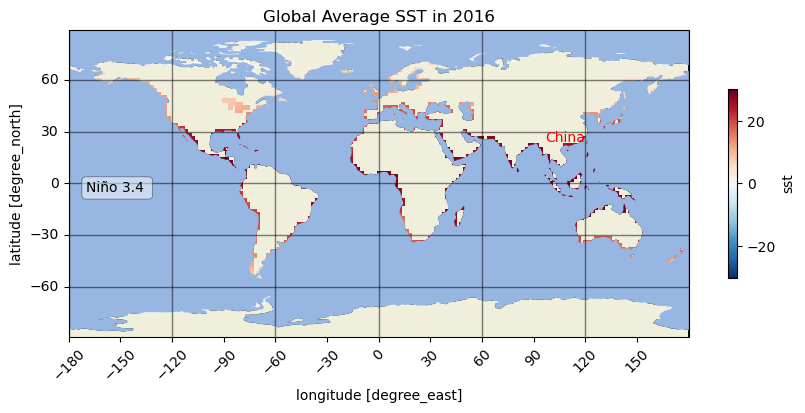

In [5]:
mean_clim = ds.sst.groupby(ds.sst.time.dt.year).mean()

# Create and define the size of the canvas
plt.figure(figsize=(10,5), dpi=100)

# Create an axes with an basic PlateCarree projection style
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add x label and ticks
plt.xlabel('longitude')
plt.xticks(ticks=np.arange(-180, 180, 30), fontsize=10, rotation=45, ha='center', va='top')
# Add y label and ticks
plt.ylabel('latitude')
plt.yticks(ticks=np.arange(-90, 90, 30), fontsize=10, rotation=0, ha='right', va='center')

#add grid and show the figure
gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1,color='black',alpha=0.5)
  
# Add LAND and Ocean feature to axes
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=1)

# Plot the SST with colorbar
mean_clim[-1].plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5})

# Add figure title
plt.title('Global Average SST in 2016')

# Add anotation 
ax.annotate('Niño 3.4 ',xy=(-170, -5),xytext=(-170, -5),fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.5))

# Add text box 
plt.text(108,24,"China",transform=plt.gca().transData, horizontalalignment='center', color='r')
plt.show()

Text(120, 24, 'TaiWan')

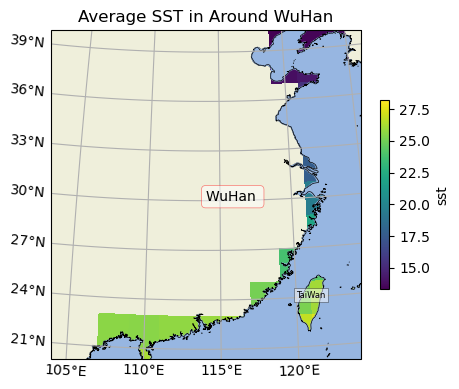

In [42]:
plt.figure(figsize=(5,5), dpi=100)
# Set Orthographic projection style
central_lon, central_lat = 114, 30 # WuHan
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-10, central_lon+10, central_lat-10, central_lat+10]
ax.set_extent(extent)

# Add features
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=0)
ax.add_feature(cfeature.OCEAN, zorder=1)
ax.coastlines(resolution='10m', linewidth=0.5)

# Add x-axis, y-axis labels and ticks
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.right_labels = False

# Plot WuHan SST 
WuHan_sst = mean_clim[-1].sel(lat=slice(20, 40), lon=slice(104, 124))
WuHan_sst.plot(ax=ax, transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.5})
# Add anotation 
ax.annotate('WuHan ',xy=(114, 39),xytext=(114,39),fontsize=10,
             bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='r',lw=0.5 ,alpha=0.5))
# Add title
plt.title('Average SST in Around WuHan')
# Add text box 
ax.text(120,24,'TaiWan',transform=ccrs.PlateCarree(),fontsize=6,
        bbox=dict(boxstyle='square,pad=0.3', fc='white', ec='black',lw=0.5 ,alpha=0.5))